In [1]:
import pandas as pd
import numpy as np

# Get the data
df = pd.read_csv('/Users/chentingkao/PracticeData/housing.csv')
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
target = raw_df.values[1::2, 2]
df = df.drop(['MEDV'], axis = 1)
df['HousePrice'] = target
feature_df = df.drop(['HousePrice'], axis = 1)
df.head()

<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\s'
/var/folders/kc/_2nh1fbx6dd_bl9j35w1q0zw0000gn/T/ipykernel_20622/4008448720.py:7: SyntaxWarning: invalid escape sequence '\s'
  raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,HousePrice
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [2]:
# know the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CRIM        506 non-null    float64
 1    ZN         506 non-null    float64
 2    INDUS      506 non-null    float64
 3    CHAS       506 non-null    int64  
 4    NOX        506 non-null    float64
 5    RM         506 non-null    float64
 6    AGE        506 non-null    float64
 7    DIS        506 non-null    float64
 8    RAD        506 non-null    int64  
 9    TAX        506 non-null    float64
 10   PTRATIO    506 non-null    float64
 11   B          506 non-null    float64
 12   LSTAT      506 non-null    float64
 13  HousePrice  506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [3]:
# get EDA
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,HousePrice
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<Axes: ylabel='HousePrice'>

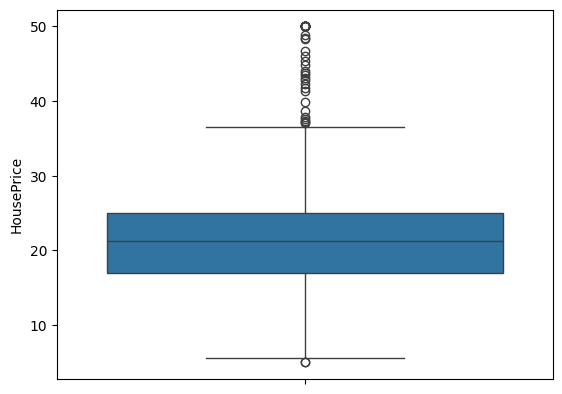

In [4]:
# use boxplot to find outliers of the target column
import seaborn as sns
sns.boxplot(df['HousePrice'])


In [5]:
# set lower limit and upper limit to deal with outliers
upper_limit = df['HousePrice'].quantile(0.99)
lower_limit = df['HousePrice'].quantile(0.01)


In [6]:
# turn outliers into lower or upper limit
df['HousePrice'] = np.where(df['HousePrice'] > upper_limit, upper_limit, df['HousePrice']) # 依舊覺得這參數的帶法相當奇怪
df['HousePrice'] = np.where(df['HousePrice'] < upper_limit, lower_limit, df['HousePrice'])


In [7]:
# 似乎沒有 categorical data，不需要作類型轉換
import statsmodels.api as sm

# 每一個自變數的常數項
X_constant = sm.add_constant(feature_df)

# run linear regression
model = sm.OLS(target, feature_df).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.959
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                              891.3
Date:                Tue, 28 May 2024   Prob (F-statistic):                        0.00
Time:                        22:24:34   Log-Likelihood:                         -1523.8
No. Observations:                 506   AIC:                                      3074.
Df Residuals:                     493   BIC:                                      3128.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.0929      0.034     -2.699      0.007      -0.161      -0.025
 ZN            0.0487      0.014      3.382      0.001       0.020       0.077
 INDUS        -0.0041      0.064     -0.063      0.950      -0.131       0.123
 CHAS          2.8540      0.904      3.157      0.002       1.078       4.630
 NOX          -2.8684      3.359     -0.854      0.394      -9.468       3.731
 RM            5.9281      0.309     19.178      0.000       5.321       6.535
 AGE          -0.0073      0.014     -0.526      0.599      -0.034       0.020
 DIS          -0.9685      0.196     -4.951      0.000      -1.353      -0.584
 RAD           0.1712      0.067      2.564      0.011       0.040       0.302
 TAX          -0.0094      0.004     -2.395      0.017      -0.017      -0.002
 PTRATIO      -0.3922      0.110     -3.570      0.000      -0.608      -0.176
 B             0.0149      0.003      5.528      0.000       0.010       0.020
 LSTAT        -0.4163      0.051     -8.197      0.000      -0.516      -0.317
==============================================================================
Omnibus:                      204.082   Durbin-Watson:                   0.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1374.225
Skew:                           1.609   Prob(JB):                    3.90e-299
Kurtosis:                      10.404   Cond. No.                     8.50e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 8.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
import matplotlib.pyplot as plt

def calculate_residuals(model, features, labels):
  predictions = model.predict(features)
  df_result = pd.DataFrame({'Actual': labels, 'Predicted': predictions})

  # calculate "abs" residual
  df_result['Residual'] = abs(df_result['Actual']) - abs(df_result['Predicted'])
  return df_result

def linear_assumptions(model, features, labels):
  df_result = calculate_residuals(model, features, labels)

  # draw a chart, fit_reg means to draw a regression line or not.
  sns.lmplot(x = 'Actual', y = 'Predicted', data = df_result, fit_reg = False)

  # np.arange: This is a function from the NumPy library that generates an array
  # of values within a specified range. By default, it generates values starting
  # from the first argument up to (but not including) the second argument, with
  # a step size of 1. You can also specify a different step size if needed.
  line_coords = np.arange(df_result.min().min(), df_result.max().max())
  plt.plot(line_coords, line_coords, color = 'darkorange', linestyle = '--')
  plt.title('Actual vs Predicted')
  plt.show()

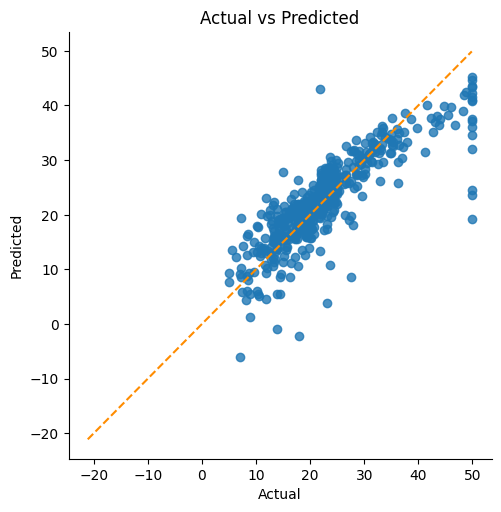

In [9]:
linear_assumptions(model, feature_df, target)

In [10]:
# Get all correlations
corr = df.corr()
corr.style.background_gradient(cmap = 'coolwarm')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,HousePrice
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.019139
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.059710
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,0.019085
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.217795
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,0.018534
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.308762
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,0.058235
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,-0.103849
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,0.022344
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,0.007728


In [11]:
# remove multicollinearity by using vif
from statsmodels.stats.outliers_influence import variance_inflation_factor
x = df.drop(['HousePrice'], axis = 1)
vif_data = pd.DataFrame()
vif_data['features'] = x.columns

# VIF is a measure of how much the variance of a regression coefficient is
# inflated due to multicollinearity among the other features
# 這個自變數的影響力有多大的部分可能來自其他自變數的影響
# 所以 VIF 越大代表該自變數越有可能是能夠被移除的，因為很可能其他變數可以取代它
vif_data['vif'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
print(vif_data)

    features        vif
0       CRIM   2.100373
1         ZN   2.844013
2      INDUS  14.485758
3       CHAS   1.152952
4        NOX  73.894947
5         RM  77.948283
6        AGE  21.386850
7        DIS  14.699652
8        RAD  15.167725
9        TAX  61.227274
10   PTRATIO  85.029547
11         B  20.104943
12     LSTAT  11.102025


In [13]:
reduced_df = df.drop([' NOX', ' AGE', ' PTRATIO', ' RM'], axis = 1)
reduced_features_df = reduced_df.drop(['HousePrice'], axis = 1)

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(reduced_features_df, target, test_size = 0.25)
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.904
Model:                            OLS   Adj. R-squared (uncentered):              0.901
Method:                 Least Squares   F-statistic:                              386.0
Date:                Tue, 28 May 2024   Prob (F-statistic):                   4.58e-182
Time:                        22:29:29   Log-Likelihood:                         -1306.2
No. Observations:                 379   AIC:                                      2630.
Df Residuals:                     370   BIC:                                      2666.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.0384      0.055     -0.701      0.484      -0.146       0.069
 ZN            0.0719      0.023      3.104      0.002       0.026       0.117
 INDUS         0.0621      0.105      0.591      0.555      -0.144       0.268
 CHAS          6.1969      1.539      4.027      0.000       3.171       9.222
 DIS           0.2792      0.269      1.038      0.300      -0.250       0.808
 RAD          -0.1581      0.117     -1.351      0.177      -0.388       0.072
 TAX           0.0203      0.006      3.176      0.002       0.008       0.033
 B             0.0562      0.004     15.149      0.000       0.049       0.063
 LSTAT        -0.6354      0.072     -8.798      0.000      -0.777      -0.493
==============================================================================
Omnibus:                       44.983   Durbin-Watson:                   1.814
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               57.562
Skew:                           0.907   Prob(JB):                     3.17e-13
Kurtosis:                       3.596   Cond. No.                     2.17e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.17e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)
y_predict_train = linear_regression.predict(X_train)
y_predict_test = linear_regression.predict(X_test)

print(r2_score(y_test, y_predict_test))
print(mean_squared_error(y_test, y_predict_test))
print(mean_absolute_error(y_test, y_predict_test))

0.5403643467434659
34.40214903162823
3.7875171393629987
